In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%load_ext watermark
%watermark -a "author: eljirg" -u -n -t -z

author: eljirg 
last updated: Sat Feb 16 2019 22:35:08 Tokyo Standard Time


# Data Visualization

A note regarding `data visualization` 

source: 
- https://matplotlib.org
- https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb

## Basic

In [2]:
%matplotlib inline

import os, sys, time, tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [3]:
# set default matplotlib figsize
plt.rcParams['figure.figsize'] = (20.0, 7.0)

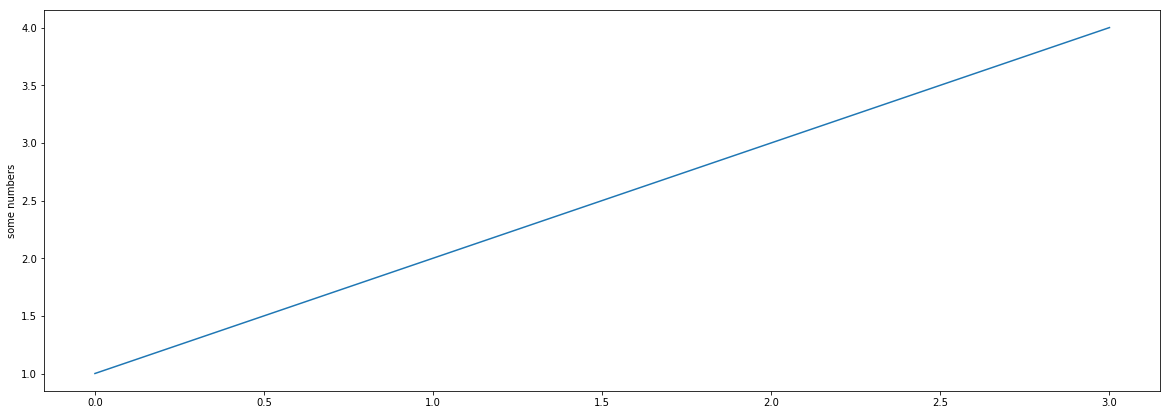

In [4]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3]

plot() is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

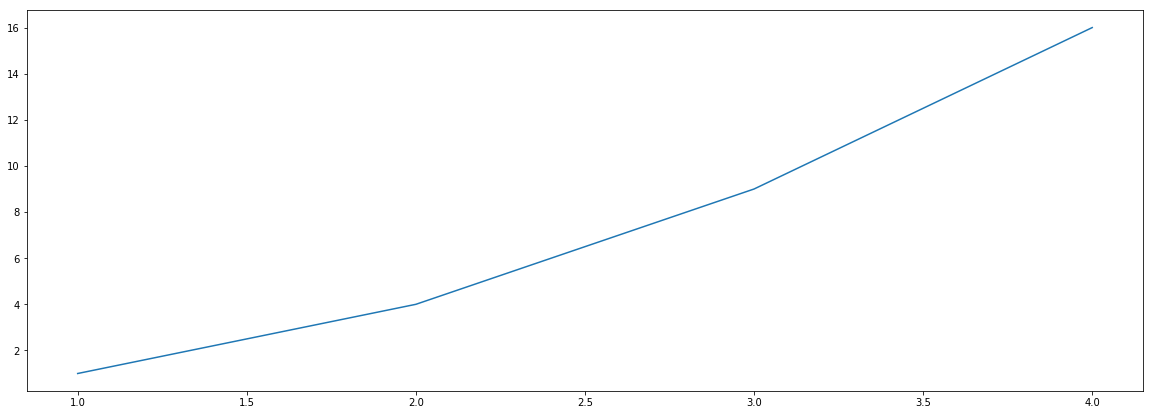

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

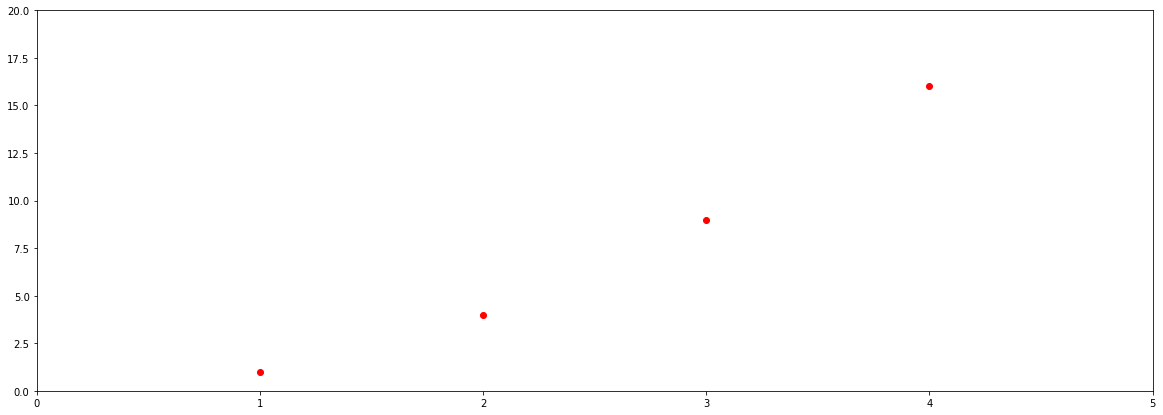

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 5, 0, 20])
plt.show()

See the [plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) documentation for a complete list of line styles and format strings. The [axis()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html#matplotlib.pyplot.axis) command in the example above takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates a plotting several lines with different format styles in one command using arrays.

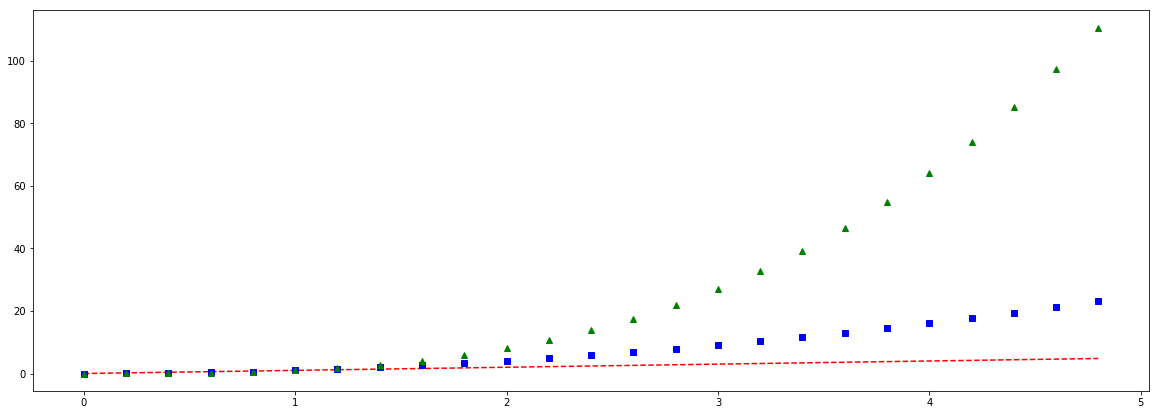

In [7]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Plotting with keyword strings
There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

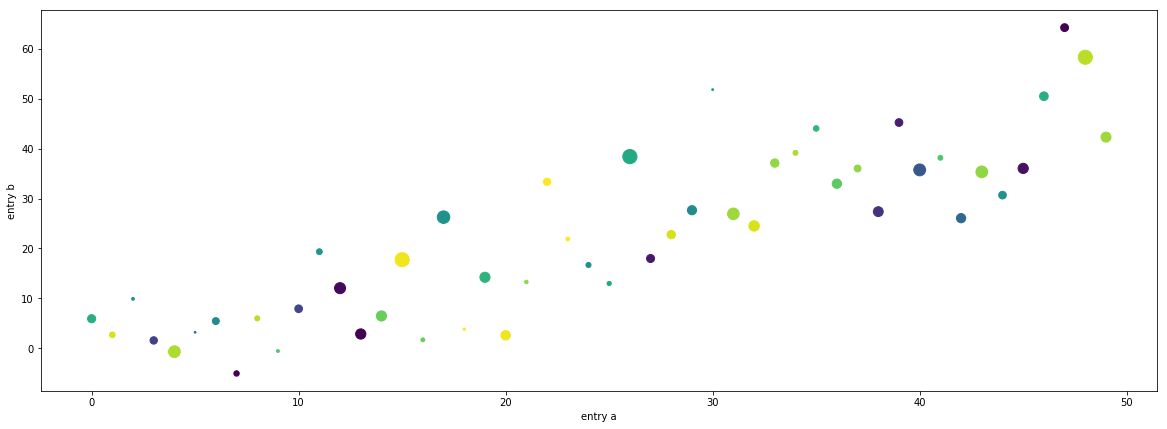

In [8]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables¶
It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

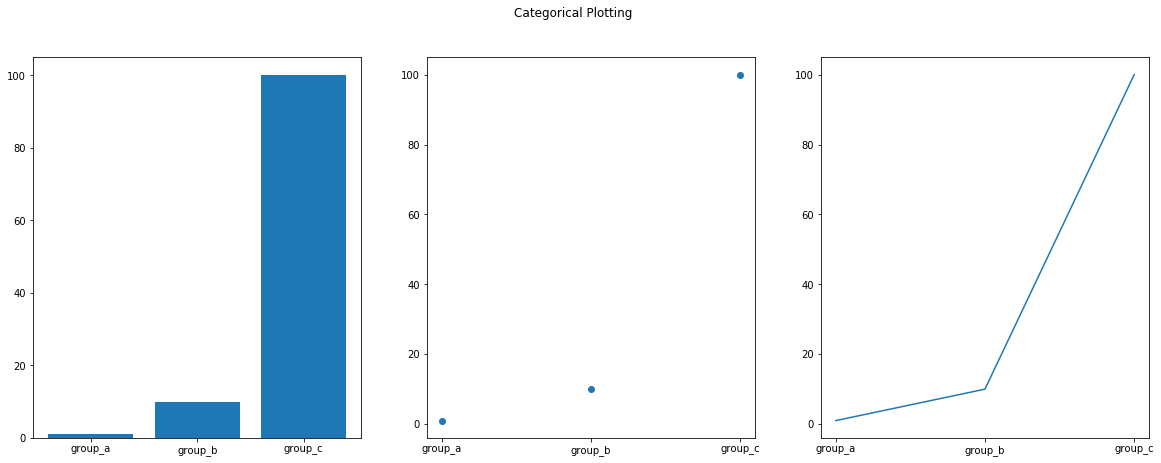

In [9]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(20, 7))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Different Plotting Code Style

### Plt style

(0.5, 4.5)

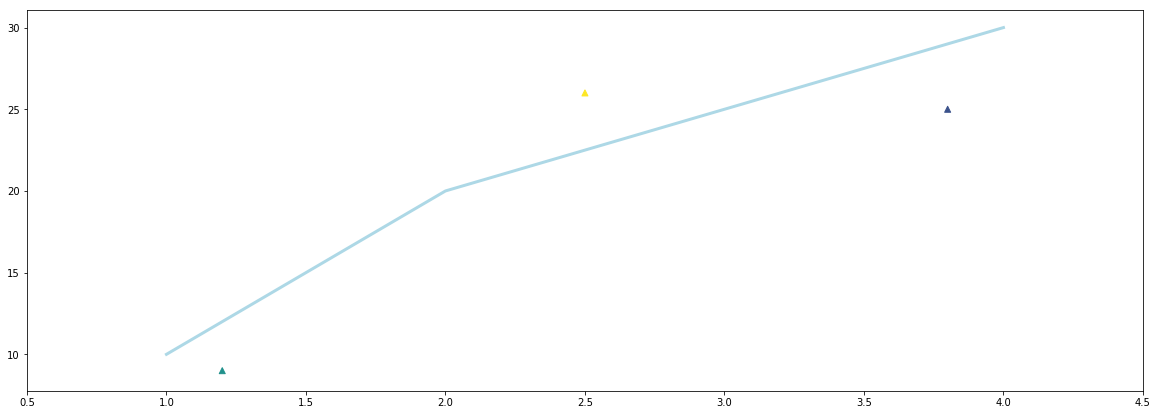

In [25]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.xlim(0.5, 4.5)

C:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


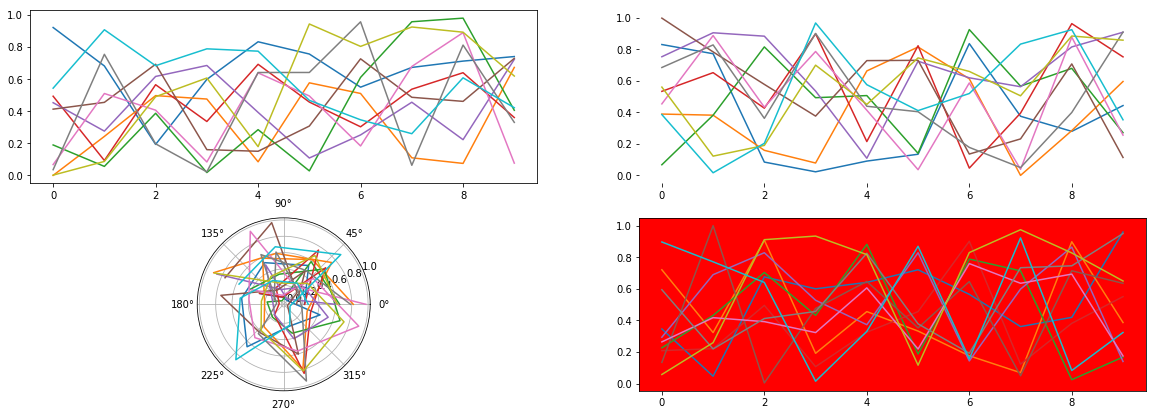

In [39]:
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2, 2, 1)
ax1.plot(rand(10,10))

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)
ax2.plot(rand(10,10))

# add a polar subplot
plt.subplot(223, projection='polar')
plt.plot(rand(10,10))

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')
plt.plot(rand(10,10))

#delete ax2 from the figure
plt.delaxes(ax2)

#add ax2 to the figure again
plt.subplot(ax2)

### Axes style

(0.5, 4.5)

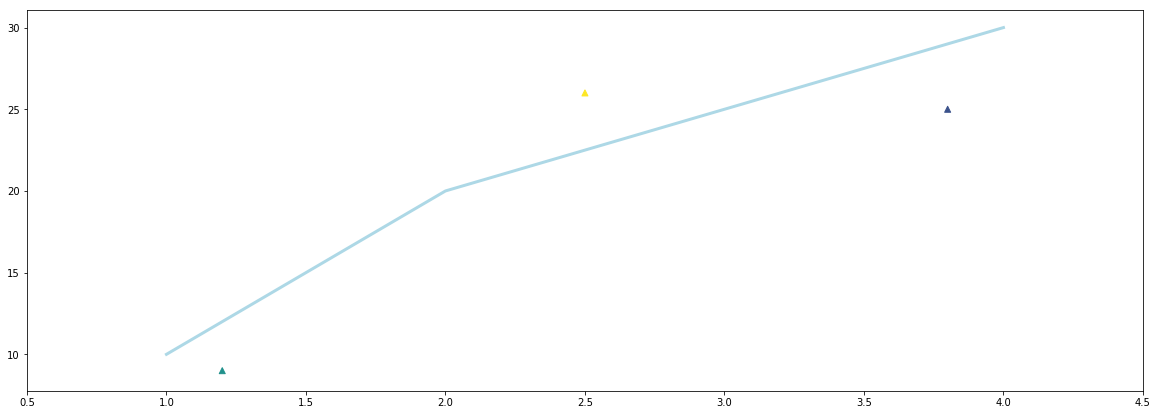

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
ax.set_xlim(0.5, 4.5)

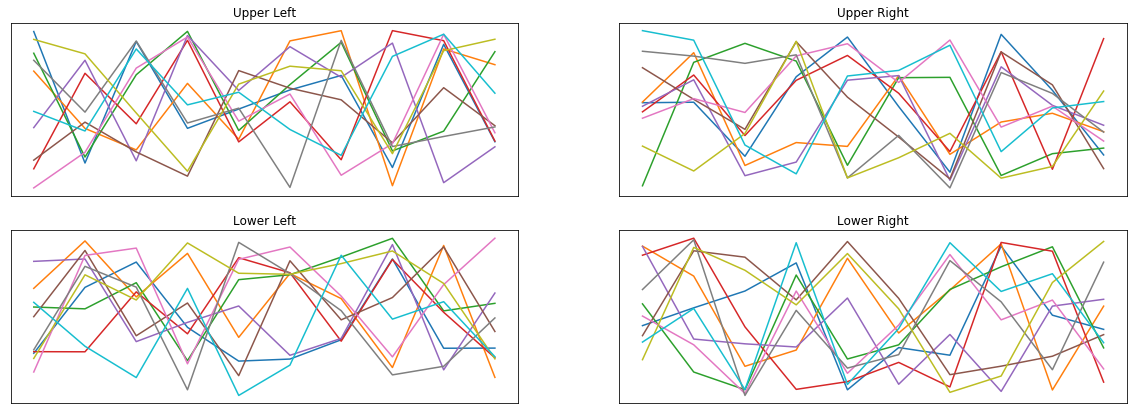

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.plot(rand(10,10))
    ax.set(xticks=[], yticks=[])
    
plt.show()

## Cool Features

### figaspect

In [22]:
w, h = figaspect(1.)
w,h

(7.0, 7.0)

In [10]:
fig = plt.figure(facecolor=(1, 0, 0, .1))   # red background to see where the figure is

<Figure size 1440x504 with 0 Axes>

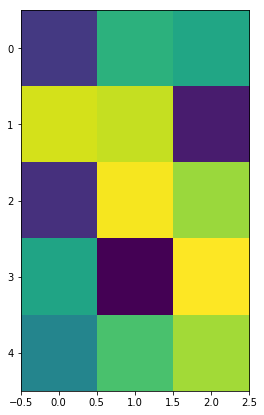

In [19]:
A = rand(5,3)
w, h = figaspect(A)
fig = Figure(figsize=(w, h))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.imshow(A)
plt.imshow(A)

## Cool Graphs

### Shaded region

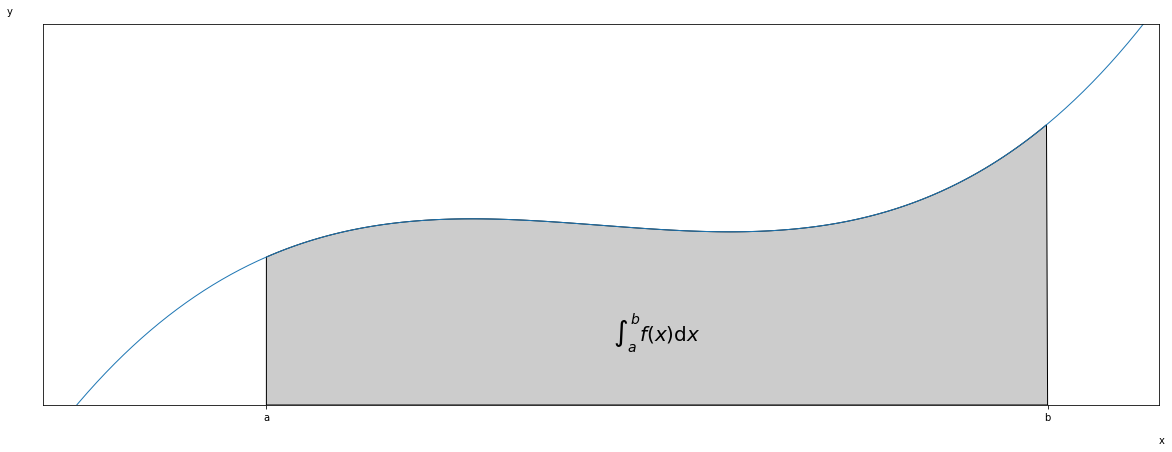

In [11]:
# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()